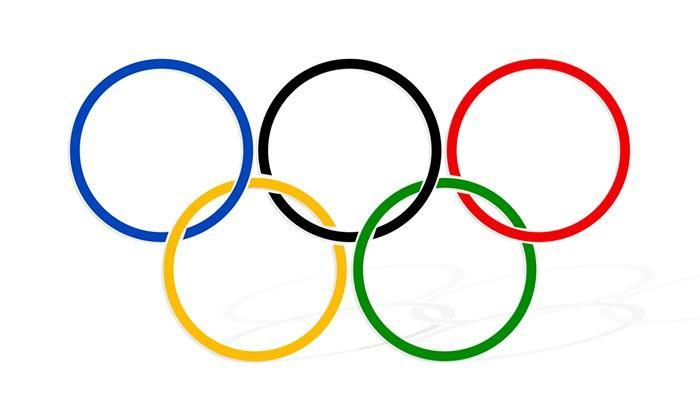

# Olympic Medalists

#### This is an analysis of all medals won in the Summer Olympic games from 1896 to 2008

In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [167]:
%matplotlib inline

In [168]:
olympicdata = pd.read_csv("Olympics.csv")

In [169]:
olympicdata

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver
...,...,...,...,...,...,...,...,...,...,...
29211,Beijing,2008,Wrestling,Wrestling Gre-R,"ENGLICH, Mirko",GER,Men,84 - 96kg,M,Silver
29212,Beijing,2008,Wrestling,Wrestling Gre-R,"MIZGAITIS, Mindaugas",LTU,Men,96 - 120kg,M,Bronze
29213,Beijing,2008,Wrestling,Wrestling Gre-R,"PATRIKEEV, Yuri",ARM,Men,96 - 120kg,M,Bronze
29214,Beijing,2008,Wrestling,Wrestling Gre-R,"LOPEZ, Mijain",CUB,Men,96 - 120kg,M,Gold


## What nation has won the most Olympic medals since the modern Olympics started

In [170]:
filtG = (olympicdata['Medal'] == "Gold") 
olympicdataGold = olympicdata.loc[filtG]

filtS = (olympicdata['Medal'] == "Silver")
olympicdataSilver = olympicdata.loc[filtS]

filtB = (olympicdata['Medal'] == "Bronze")
olympicdataBronze = olympicdata.loc[filtB]

In [171]:
olympicdataGoldNation = olympicdataGold.groupby(['NOC'])['Medal'].agg(["count"])
olympicdataSilverNation = olympicdataSilver.groupby(['NOC'])['Medal'].agg(["count"])
olympicdataBronzeNation = olympicdataBronze.groupby(['NOC'])['Medal'].agg(["count"])

In [172]:
olympicdataGoldNation

,count
NOC,
ALG,4
ANZ,20
ARG,68
ARM,1
AUS,293
...,...
UZB,4
VEN,1
YUG,143


In [173]:
olympicdataSilverNation

,count
NOC,
AHO,1
ALG,2
ANZ,4
ARG,83
ARM,1
...,...
VIE,2
YUG,174
ZAM,1


In [174]:
olympicdataBronzeNation

,count
NOC,
AFG,1
ALG,8
ANZ,5
ARG,88
ARM,7
...,...
VEN,8
YUG,118
ZAM,1


In [175]:
olympicdataGoldNation = olympicdataGoldNation['count'].nlargest(n=10)
olympicdataSilverNation = olympicdataSilverNation['count'].nlargest(n=10)
olympicdataBronzeNation = olympicdataBronzeNation['count'].nlargest(n=10)

<AxesSubplot:title={'center':'Olympic Golds'}, xlabel='Nation', ylabel='Gold Medals'>

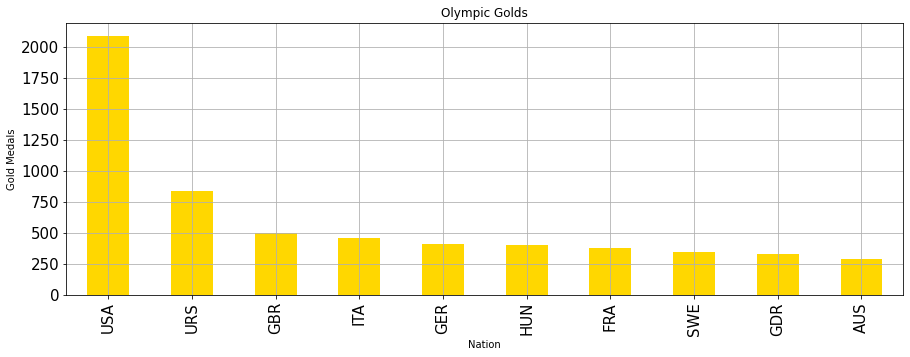

In [141]:
olympicdataGoldNation.plot(title = 'Olympic Golds', figsize = (15,5), kind= 'bar', xlabel = 'Nation', ylabel = 'Gold Medals',fontsize = 15, grid = True, color = 'Gold')

<AxesSubplot:title={'center':'Olympic Silvers'}, xlabel='Nation', ylabel='Silver Medals'>

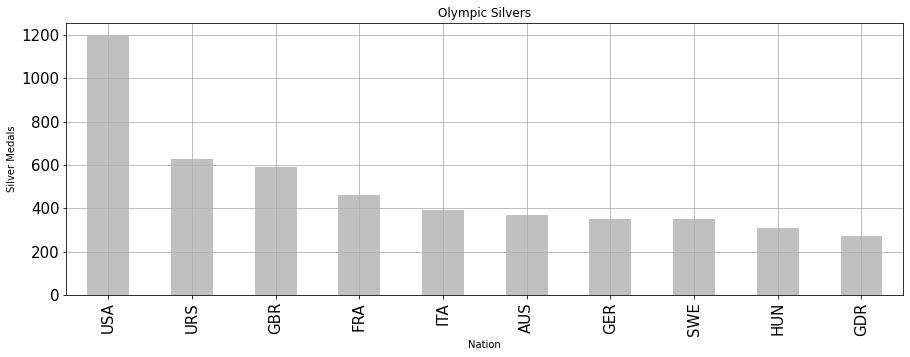

In [142]:
olympicdataSilverNation.plot(title = 'Olympic Silvers', figsize = (15,5), kind= 'bar', xlabel = 'Nation', ylabel = 'Silver Medals',fontsize = 15, grid = True, color = 'Silver')


<AxesSubplot:title={'center':'Olympic Bronzes'}, xlabel='Nation', ylabel='Bronze Medals'>

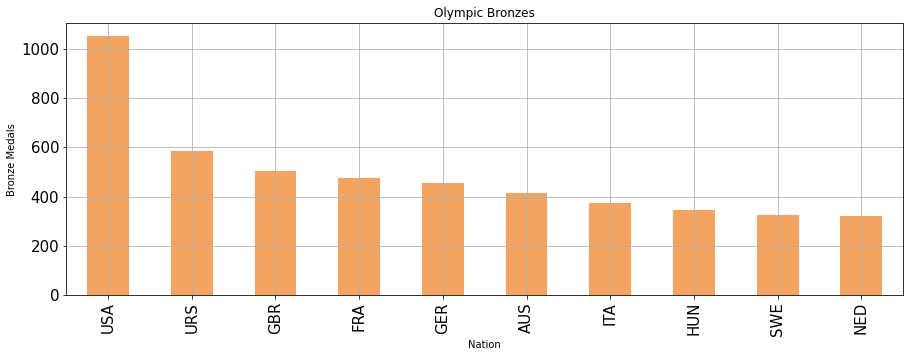

In [143]:
olympicdataBronzeNation.plot(title = 'Olympic Bronzes', figsize = (15,5), kind= 'bar', xlabel = 'Nation', ylabel = 'Bronze Medals',fontsize = 15, grid = True, color = 'SandyBrown')

### Which Athlete has won most golds

In [144]:
olympicdataGoldAthlete = olympicdataGold.groupby(['Athlete'])['Medal'].agg(["count"])


In [145]:
olympicdataGoldAthlete

,count
Athlete,
"AABYE, Edgar",1
"AALTONEN, Paavo Johannes",3
"AAMODT, Ragnhild",1
"AAS, Thomas Valentin",1
"ABALMASAU, Aliaksei",1
...,...
"ÖRVIG, Thor",1
"ÖSTERVOLD, Henrik",1
"ÖSTERVOLD, Jan Olsen",1


In [146]:
olympicdataGoldAthlete = olympicdataGoldAthlete['count'].nlargest(n=20)

<AxesSubplot:title={'center':'Olympic Golds'}, ylabel='Athlete'>

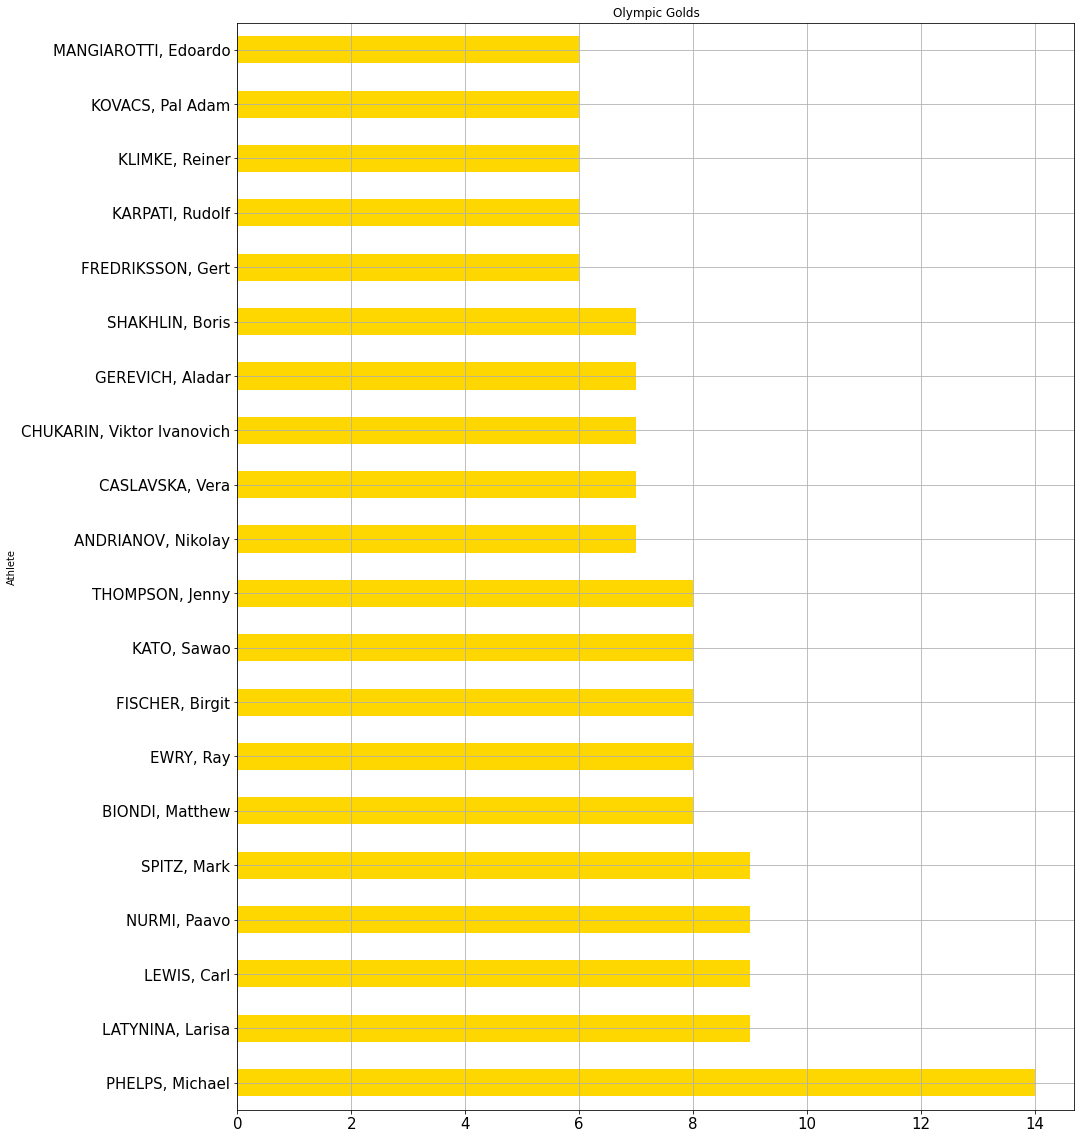

In [147]:
olympicdataGoldAthlete.plot(title = 'Olympic Golds', figsize = (15,20), kind= 'barh', xlabel = 'Athlete', ylabel = 'Gold Medals',fontsize = 15, grid = True, color = 'Gold')

### How have Britains Athletes done ?

In [148]:
filtGBR = (olympicdata['NOC'] == "GBR")
olympicdataGBR = olympicdata.loc[filtGBR]

In [149]:
olympicdataGBR = olympicdataGBR.groupby(['Athlete'])['Medal'].agg(["count"])


In [150]:
olympicdataGBR = olympicdataGBR['count'].nlargest(n=20)

<AxesSubplot:title={'center':'GB Olympic Medals'}, ylabel='Athlete'>

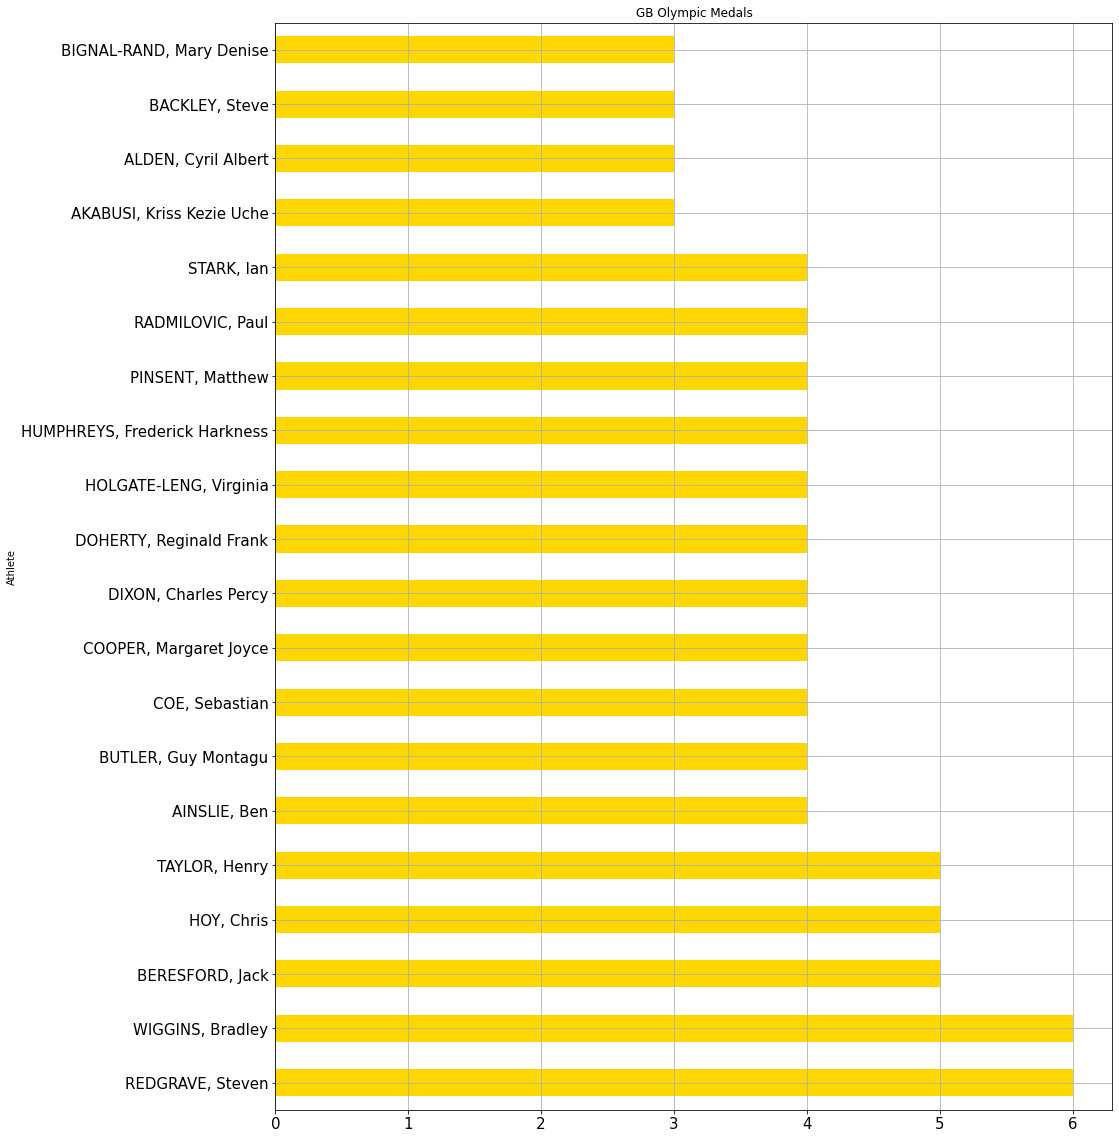

In [151]:
olympicdataGBR.plot(title = 'GB Olympic Medals', figsize = (15,20), kind= 'barh', xlabel = 'Athlete', ylabel = 'Medals',fontsize = 15, grid = True, color = 'Gold')

### What are Britains best events ?

In [152]:
filtGBR = (olympicdata['NOC'] == "GBR")
olympicdataGBR = olympicdata.loc[filtGBR]

olympicdataEventGBR = olympicdataGBR.groupby(['Discipline'])['Medal'].agg(["count"])

In [153]:
olympicdataEventGBR = olympicdataEventGBR['count'].nlargest(n=10)

In [154]:
olympicdataEventGBR

Discipline
Athletics        289
Rowing           216
Sailing          126
Hockey           110
Cycling Track    105
Swimming         103
Shooting          94
Tennis            58
Boxing            48
Eventing          44
Name: count, dtype: int64

<AxesSubplot:title={'center':'GB Olympic Medals by Event'}, ylabel='Event'>

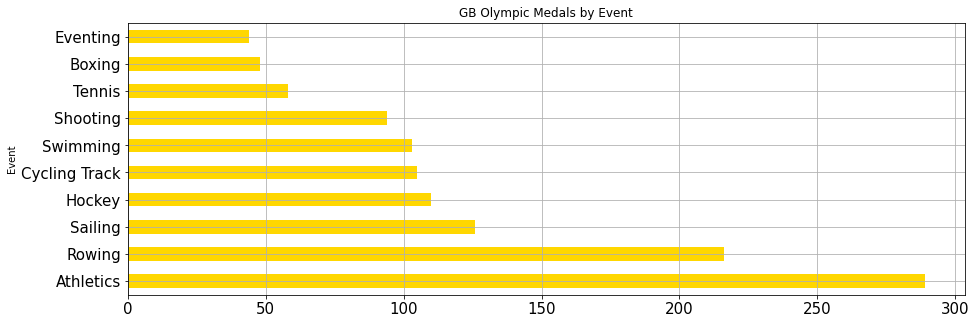

In [163]:
olympicdataEventGBR.plot(title = 'GB Olympic Medals by Event', figsize = (15,5), kind= 'barh', xlabel = 'Event', ylabel = 'Medals',fontsize = 15, grid = True, color = 'Gold', sort_columns = False)